<a href="https://colab.research.google.com/github/JimHuynh25/assi3/blob/main/assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

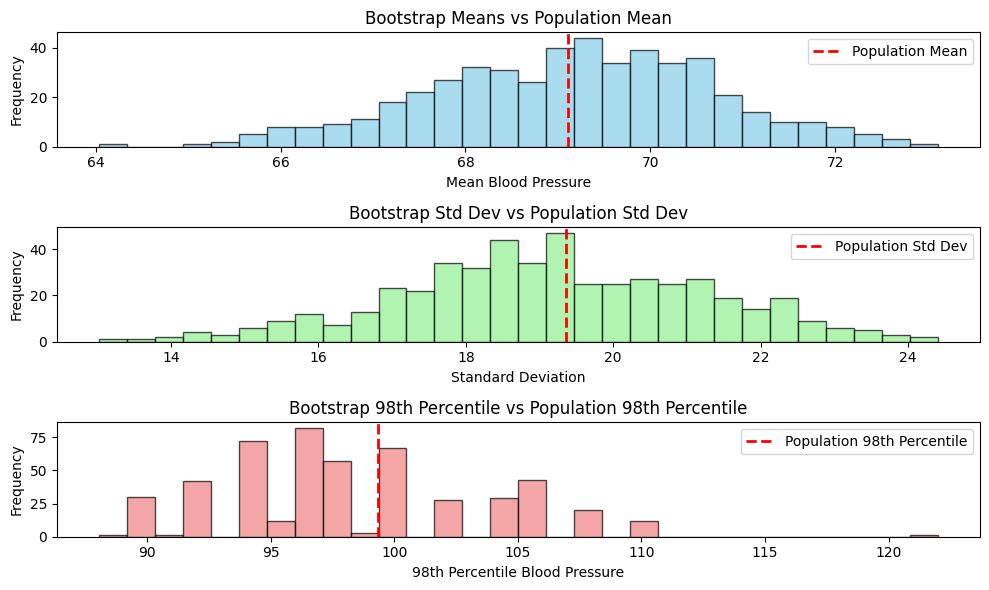

In [6]:
# Load the diabetes dataset
diabetes_df = pd.read_csv('diabetes.csv')

# Task (c) - Bootstrap sampling for BloodPressure statistics
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

# Number of bootstrap samples
n_samples = 500
sample_size = 150

for _ in range(n_samples):
    # Bootstrap sample with replacement
    bootstrap_sample = diabetes_df['BloodPressure'].sample(n=sample_size, replace=True)
    # Calculate statistics
    bootstrap_means.append(bootstrap_sample.mean())
    bootstrap_stds.append(bootstrap_sample.std())
    bootstrap_percentiles.append(np.percentile(bootstrap_sample, 98))

# Population statistics for BloodPressure
population_mean_bp = diabetes_df['BloodPressure'].mean()
population_std_bp = diabetes_df['BloodPressure'].std()
population_98th_bp = np.percentile(diabetes_df['BloodPressure'], 98)

# Plotting the distribution of bootstrap statistics
plt.figure(figsize=(10, 6))

# Plotting mean comparison
plt.subplot(3, 1, 1)
plt.hist(bootstrap_means, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(population_mean_bp, color='red', linestyle='dashed', linewidth=2, label='Population Mean')
plt.title('Bootstrap Means vs Population Mean')
plt.xlabel('Mean Blood Pressure')
plt.ylabel('Frequency')
plt.legend()

# Plotting standard deviation comparison
plt.subplot(3, 1, 2)
plt.hist(bootstrap_stds, bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
plt.axvline(population_std_bp, color='red', linestyle='dashed', linewidth=2, label='Population Std Dev')
plt.title('Bootstrap Std Dev vs Population Std Dev')
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')
plt.legend()

# Plotting percentile comparison
plt.subplot(3, 1, 3)
plt.hist(bootstrap_percentiles, bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
plt.axvline(population_98th_bp, color='red', linestyle='dashed', linewidth=2, label='Population 98th Percentile')
plt.title('Bootstrap 98th Percentile vs Population 98th Percentile')
plt.xlabel('98th Percentile Blood Pressure')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()